In [2]:
# import libraries 
import numpy as np 
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
# reading the dataset 
data = pd.read_csv('naukri.csv')

# shape of the dataset
data.shape

(22000, 14)

In [4]:
# reading the head of the data
data.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [5]:
data['joblocation_address']=data['joblocation_address'].str.split(',')
data['joblocation_address'].iloc[:5]

0                                            [Chennai]
1                                            [Chennai]
2                                          [Bengaluru]
3    [Mumbai,  Bengaluru,  Kolkata,  Chennai,  Coim...
4                                          [Bengaluru]
Name: joblocation_address, dtype: object

In [6]:
data = data.explode('joblocation_address')
pd.set_option('max_rows', 30000)
data['joblocation_address'].value_counts()[:20]

Bengaluru/Bangalore           3775
Mumbai                        2593
Bengaluru/Bangalore           2134
Bengaluru                     2026
 Mumbai                       1378
Chennai                       1290
Hyderabad / Secunderabad      1246
Hyderabad                     1154
Mumbai                        1067
 Mumbai                        923
 Chennai                       905
Delhi                          790
Noida                          777
Gurgaon                        762
 Chennai                       738
 Hyderabad / Secunderabad      700
Delhi                          680
 Pune                          645
 Delhi                         602
 Gurgaon                       557
Name: joblocation_address, dtype: int64

In [8]:

data['joblocation_address'] = data['joblocation_address'].replace(('(Bengaluru/Bangalore)',' Bangalore',
                                                                ' Bangalore ','Bangalore ','Bengaluru/Bangalore ',
                                                                 ' Bengaluru/Bangalore ',' Bengaluru/Bangalore',
                                                                'Bengaluru/Bangalore','Bengaluru','NCR Bangalore',
                                                                'NCR Bangalore ','Near Bangalore', ' Bengaluru/Bangalore',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru',
                                                                 'Bangalore , Bangalore / Bangalore',
                                                                 'Bangalore , karnataka',' Bengaluru / Bangalore', 
                                                                 ' Bengaluru / Bangalore ', 'Bengaluru Bangalore',
                                                                 'India-Karnataka-Bangalore',' bangalore',' karnataka',
                                                                ' Bengaluru Bangalore'),
                                                                ('Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                 'Bangalore','Bangalore', 'Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore',))
                                                                
data['joblocation_address'] = data['joblocation_address'].replace(('Hyderabad / Secunderabad',' Hyderabad / Secunderabad',
                                                                 ' Hyderabad / Secunderabad ','Hyderabad / Secunderabad ',
                                                                ' Hyderabad','Hyderabad ',' Hyderabad ',
                                                                 'Hyderabad/Secunderabad','Hyderabad/Secunderabad ',
                                                                ' Hyderabad/Secunderabad ',' Hyderabad/Secunderabad',),
                                                                ('Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                 'Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                'Hyderabad','Hyderabad','Hyderabad'))


  
data['joblocation_address'] = data['joblocation_address'].replace(('NAVI MUMBAI',' NAVI MUMBAI','NAVI MUMBAI ',
                                                                 ' NAVI MUMBAI',' NAVI MUMBAI ','Mumbai , Mumbai',
                                                                 ' Mumbai',' Mumbai ','Mumbai ','mumbai','Navi Mumbai',
                                                                ' Navi Mumbai',' Navi Mumbai ','Navi Mumbai ', 
                                                                 ' Mumbai Suburbs','Mumbai Suburbs ','Mumbai Suburbs',
                                                                ' Mumbai Suburbs ','mumbai',' mumbai','mumbai ',
                                                                 ' maharashtra'),
                                                                ('Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                 'Mumbai','Mumbai','Mumbai', 'Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai', 'Mumbai'))

data['joblocation_address'] = data['joblocation_address'].replace(('Noida','Noida ',' Noida',' Delhi','Delhi','Delhi ',' Delhi ',
                                                                 'Gurgaon',' Gurgaon',' Gurgaon ','Gurgaon ', ' noida',
                                                                 ' Noida/Greater Noida',' Noida ', ' Delhi NCR',
                                                                 'Delhi/NCR(National Capital Region)',' Delhi/NCR ',
                                                                 ' Delhi/NCR(National Capital Region)',
                                                                 ' Delhi/NCR(National Capital Region) ',
                                                                 'Delhi/NCR(National Capital Region) ','Delhi , Delhi',
                                                                 'Noida , Noida/Greater Noida','Ghaziabad',
                                                                 'Delhi/NCR(National Capital Region) , Gurgaon',
                                                                 'NCR , NCR','NCR/NCR(National Capital Region)',
                                                                'NCR , NCR/Greater NCR','NCR/NCR(National Capital Region), NCR',
                                                                 'NCR , NCR/NCR(National Capital Region)',
                                                                 'NCR/NCR(National Capital Region)','NCR/Greater NCR',
                                                                 'NCR/NCR(National Capital Region) , NCR','Delhi/NCR ',
                                                                ' Noida/Greater Noida','Greater Noida',' Greater Noida',
                                                                 ' Greater Noida ','Greater Noida ','Ghaziabad',' Ghaziabad',
                                                                 'Ghaziabad ',' Ghaziabad ','Faridabad','Faridabad ',
                                                                 ' Faridabad',' Faridabad ',' Noida/Greater Noida',
                                                                 ' Noida/Greater Noida ',' delhi',' Delhi/NCR','Delhi NCR'
                                                                ),
                                                                ('NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR', 'NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR'))


data['joblocation_address'] = data['joblocation_address'].replace(('Chennai ',' Chennai',' Chennai ',' Chennai',
                                                                 'chennai ',' chennai',' chennai ',' chennai',),
                                                                ('Chennai', 'Chennai','Chennai','Chennai','Chennai',
                                                                'Chennai','Chennai','Chennai',))

data['joblocation_address'] = data['joblocation_address'].replace(('Pune ',' Pune',' Pune '),('Pune','Pune','Pune'))
data['joblocation_address'] = data['joblocation_address'].replace(('Kolkata ',' Kolkata',' Kolkata ',
                                                                ' kolkata','kolkata ',' kolkata'),
                                                                ('Kolkata','Kolkata','Kolkata',
                                                                  'Kolkata','Kolkata','Kolkata'))
data['joblocation_address'] = data['joblocation_address'].replace((' Ahmedabad','Ahmedabad ',' Ahmedabad '),('Ahmedabad',
                                                                                         'Ahmedabad','Ahmedabad'))
data['joblocation_address'] = data['joblocation_address'].replace(('Chandigarh ',' Chandigarh',' Chandigarh '),
                                                                ('Chandigarh','Chandigarh','Chandigarh'))
data['joblocation_address'] = data['joblocation_address'].replace(('Surat ',' Surat',' Surat '),
                                                                ('Surat','Surat','Surat'))
data['joblocation_address'] = data['joblocation_address'].replace(('Ernakulam / Kochi/ Cochin ', ' Kochi', 'Kochi ',' Kochi ',
                                                                 ' Cochin/ Kochi/ Ernakulam', ' Cochin/ Kochi/ Ernakulam ', 
                                                                 ' Ernakulam / Kochi/ Cochin',' Ernakulam / Kochi/ Cochin '),
                                                                ('Kochi','Kochi','Kochi','Kochi','Kochi','Kochi','Kochi',
                                                                 'Kochi',))
data['joblocation_address'] = data['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_address'] = data['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_address'] = data['joblocation_address'].replace(('Lucknow ',' Lucknow',' Lucknow '),
                                                                ('Lucknow','Lucknow','Lucknow'))
data['joblocation_address'] = data['joblocation_address'].replace(('Jaipur ',' Jaipur',' Jaipur ','jaipur ',' jaipur',
                                                                 ' jaipur '),
                                                                ('Jaipur','Jaipur','Jaipur','Jaipur','Jaipur','Jaipur'))
data['joblocation_address'] = data['joblocation_address'].replace(('Vijayawada ',' Vijayawada',' Vijayawada '),
                                                                ('Vijayawada','Vijayawada','Vijayawada'))
data['joblocation_address'] = data['joblocation_address'].replace(('Visakhapatnam ',' Visakhapatnam',' Visakhapatnam ',
                                                                'Visakhapatnam/Vizag ',' Visakhapatnam/Vizag',
                                                                 ' Visakhapatnam/Vizag '),
                                                                ('Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                 'Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                ))

data['joblocation_address'] = data['joblocation_address'].replace((' Bhubaneshwar',' Bhubaneshwar',' Bhubaneshwar '),
                                                                ('Bhubaneshwar','Bhubaneshwar','Bhubaneshwar'))
data['joblocation_address'] = data['joblocation_address'].replace((' Patna',' Patna',' Patna '),
                                                                ('Patna','Patna','Patna'))

data['joblocation_address'] = data['joblocation_address'].replace((' Trivandrum',' Trivandrum',' Trivandrum '),
                                                                ('Trivandrum','Trivandrum','Trivandrum'))

data['joblocation_address'] = data['joblocation_address'].replace((' Mangalore',' Mangalore',' Mangalore '),
                                                                ('Mangalore','Mangalore','Mangalore'))
data['joblocation_address'] = data['joblocation_address'].replace((' Indore',' Indore',' Indore '),
                                                                ('Indore','Indore','Indore'))
data['joblocation_address'] = data['joblocation_address'].replace((' Guwahati',' Guwahati',' Guwahati '),
                                                                ('Guwahati','Guwahati','Guwahati'))
data['joblocation_address'] = data['joblocation_address'].replace((' Nagpur',' Nagpur',' Nagpur '),
                                                                ('Nagpur','Nagpur','Nagpur'))
data['joblocation_address'] = data['joblocation_address'].replace((' Raipur',' Raipur',' Raipur '),
                                                                ('Raipur','Raipur','Raipur'))
data['joblocation_address'] = data['joblocation_address'].replace((' Thane',' Thane',' Thane '),
                                                                ('Thane','Thane','Thane'))
data['joblocation_address'] = data['joblocation_address'].replace((' Bhopal',' Bhopal',' Bhopal '),
                                                                ('Bhopal','Bhopal','Bhopal'))
data['joblocation_address'] = data['joblocation_address'].replace((' Vadodara/Baroda',' Vadodara/Baroda',' Vadodara/Baroda ',
                                                                ' Vadodara','Vadodara ',' Vadodara '),
                                                                ('Vadodara','Vadodara','Vadodara','Vadodara',
                                                                 'Vadodara','Vadodara',))
                                                                                                                                  
pd.set_option('max_rows', 2400)
data['joblocation_address'].value_counts()

Bangalore                                         9963
NCR                                               8668
Mumbai                                            6403
Hyderabad                                         4570
Chennai                                           3373
Pune                                              1227
Kolkata                                            543
Ahmedabad                                          404
Chandigarh                                         189
Kochi                                              140
Coimbatore                                         136
Jaipur                                             131
Visakhapatnam                                      125
Surat                                              106
Lucknow                                            101
Vijayawada                                          84
Bhubaneshwar                                        74
Trivandrum                                          69
Vadodara  

In [10]:
counts = data['joblocation_address'].value_counts()
data = data.loc[data['joblocation_address'].isin(counts.index[counts > 25])]
display(data['joblocation_address'].value_counts())

Bangalore        9963
NCR              8668
Mumbai           6403
Hyderabad        4570
Chennai          3373
Pune             1227
Kolkata           543
Ahmedabad         404
Chandigarh        189
Kochi             140
Coimbatore        136
Jaipur            131
Visakhapatnam     125
Surat             106
Lucknow           101
Vijayawada         84
Bhubaneshwar       74
Trivandrum         69
Vadodara           65
Indore             63
Mangalore          57
Thane              48
Nagpur             45
Bhopal             42
Guwahati           39
Raipur             32
Patna              26
Name: joblocation_address, dtype: int64

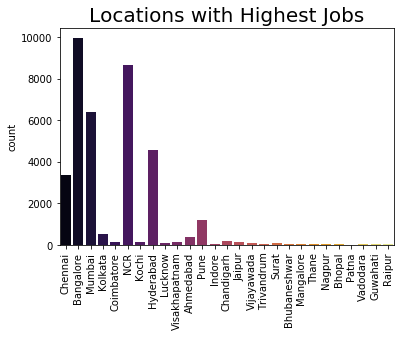

In [12]:
sbn.countplot(data['joblocation_address'], palette = 'inferno')
plt.title('Locations with Highest Jobs', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)
plt.show()

In [13]:
data['experience'] = data['experience'].str.split(" ")
data['Min Experience'] = data['experience'].apply(lambda x: x[0])
data['Max Experience'] = data['experience'].apply(lambda x: x[2] if len(x) > 2 else x[1])

In [14]:
data['Min Experience'].value_counts()

2      7301
0      6340
3      5343
1      4490
5      3329
4      3135
6      1530
10     1430
8      1292
7      1048
9       486
12      315
15      285
Not     111
11       75
13       74
14       63
20       26
18       25
16       16
17        6
23        1
25        1
26        1
Name: Min Experience, dtype: int64

In [15]:
data['Max Experience'].value_counts()

5            6458
7            4494
8            3740
6            3303
3            3233
10           2860
4            2664
9            1815
2            1597
12           1085
1            1064
11           1059
15            834
13            682
20            501
0             358
14            251
18            134
Mentioned     111
16            109
17             94
25             85
22             85
19             27
23             26
24             20
21             12
30             11
28              8
26              1
-1              1
27              1
Name: Max Experience, dtype: int64

In [16]:
data['Min Experience'] = data['Min Experience'].replace('Not',0)
data['Max Experience'] = data['Max Experience'].replace(('Mentioned','-1'), (5,5))

# lets convert thenm into numerical data types
data['Min Experience'] = data['Min Experience'].astype('int')
data['Max Experience'] = data['Max Experience'].astype('int')

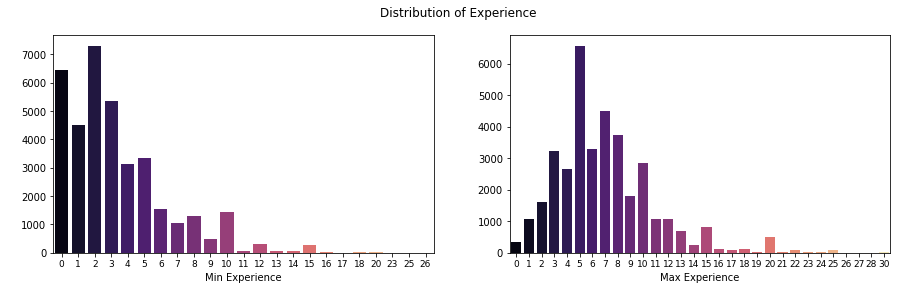

In [17]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sbn.countplot(data['Min Experience'], palette = 'magma')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.subplot(1, 2, 2)
sbn.countplot(data['Max Experience'], palette = 'magma')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.suptitle('Distribution of Experience')
plt.show()

In [18]:
data['education'] = data['education'].fillna('UG: Any Graduate - Any Specialization')
data['education'].isnull().sum()
data['Education'] = data['education'].str.split(' ')
data['Education'] = data['Education'].apply(lambda x: x[1] if len(x) > 1 else x[0])

data['Education'].value_counts(dropna = False)

# let's do some cleaning

data['Education'] = data['Education'].replace(('B.Tech/B.E.','Graduation','Other','-','Not','B.Tech/B.E.,','Postgraduate',
                                               'PG:CA','Diploma,','B.Com,','B.Pharma,','B.A,','BCA,','B.Sc,','MBA/PGDM','B.B.A,',
                                              'PG:Other','Doctorate:Doctorate','Post'),
                                              ('B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech',
                                              'CA','Diploma','B.Com','B.Pharma','B.A','BCA','B.Sc','MBA','BBA',
                                              'B.Tech','Doctorate','B.Tech'))

data['Education'].value_counts()

Any          24216
B.Tech        9464
B.Com          652
B.Sc           565
Diploma        446
B.B.A          267
B.A            243
BCA            177
MBBS           155
BDS            109
B.Pharma       104
B.Ed            85
LLB             71
Doctorate       58
BHM             54
B.Arch          37
CA              10
BVSC             3
MBA              2
BBA              2
BAMS             1
BFA              1
B.Des.           1
Name: Education, dtype: int64

In [19]:
data['industry'] = data['industry'].fillna(data['industry'].mode()[0])

data['industry'].isnull().sum()

0

IT-Software                 14696
BPO                          2321
Banking                      2113
Education                    1727
Recruitment                  1538
Automobile                   1171
Internet                     1025
Pharma                       1023
Construction                  953
Medical                       874
Travel                        733
Industrial Products           608
Accounting                    548
Other                         548
Strategy                      518
Advertising                   472
IT-Hardware & Networking      443
Media                         426
FMCG                          426
Insurance                     400
Retail                        371
Oil and Gas                   347
Telecom/ISP /                 316
Real Estate                   306
Consumer Electronics          268
Semiconductors                249
Electricals                   243
Textiles                      194
Courier                       183
KPO           

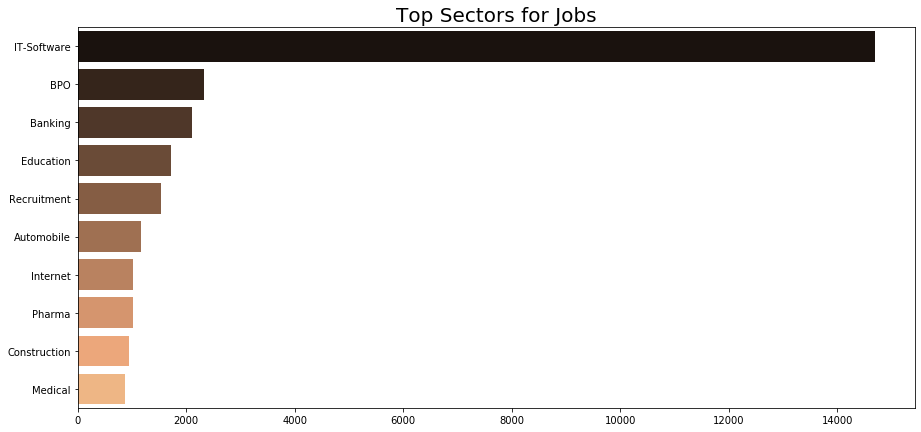

In [21]:
data['Industry'] = data['industry'].str.split(' / ')
data['Industry'] = data['Industry'].apply(lambda x: x[0])

display(data['Industry'].value_counts())

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Top Sectors for Jobs', fontsize = 20)
sbn.barplot(y = data['Industry'].value_counts().head(10).index,
            x = data['Industry'].value_counts().head(10).values,
            palette = 'copper')
plt.show()

In [22]:
data['skills'] = data['skills'].fillna(data['skills'].mode()[0])
data['skills'].isnull().sum()

0

Application Programming              9985
Sales                                5933
ITES                                 2953
Production                           1587
Accounts                             1539
HR                                   1455
Teaching                             1351
Marketing                            1328
Medical                               818
Financial Services                    751
Site Engineering                      672
Other                                 634
Engineering Design                    624
ERP                                   564
eCommerce                             530
Network Administration                507
QA & Testing                          479
IT Hardware                           466
Journalism                            427
DBA                                   424
Supply Chain                          379
Embedded                              368
Design                                343
Hotels                            

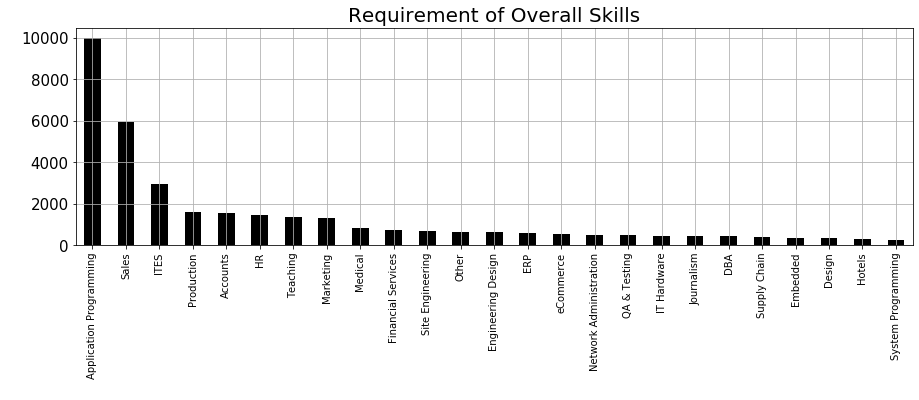

In [23]:
data['Skills'] = data['skills'].str.split(" - ")
data['Skills'] = data['Skills'].apply(lambda x: x[1] if len(x) > 1 else x[0])
display(data['Skills'].value_counts())

plt.rcParams['figure.figsize'] = (15, 4)
plt.title('Requirement of Overall Skills', fontsize = 20)
data['Skills'].value_counts().head(25).plot(kind = 'bar', color = 'black')
plt.grid()
plt.yticks(fontsize = 15)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [24]:
data.isnull().sum()

company                    0
education                  0
experience                 0
industry                   0
jobdescription             0
jobid                      0
joblocation_address        0
jobtitle                   0
numberofpositions      27829
payrate                   93
postdate                  29
site_name              31217
skills                     0
uniq_id                    0
Min Experience             0
Max Experience             0
Education                  0
Industry                   0
Skills                     0
dtype: int64

In [25]:
data['numberofpositions'] = data['numberofpositions'].fillna(1)
data['numberofpositions'] = data['numberofpositions'].astype('int')

# If the job post date and pay rate is missing it is useless, so lets remove the records where jobppostdate is not mentioned
data = data.dropna()
data.isnull().sum().sum()

0